# Node and Link analysis: Centrality measures

Centrality measures are used to appraise the "importance" of the elements of the network. The problem is that "importance"
* Is not well-defined
* Depends on the domain of the network

During this seminar we will consider two node centrality measures: *degree centrality* and *closeness centrality*

## Degree Centrality

In fact you have already met the degree centrality in this course. 

Given adjacency matrix $A$ of the **unweighted** and **undirected** graph $G = (V,E)$ degree centrality of the node $v_i$ is computed as:
$$ C_D(i) = \sum_j A_{ji} $$
In order to compare nodes across graphs this measure can be normalized by a factor $\frac{1}{N-1}$



## Closeness Centrality

The most correspondent to the word "central". Closeness centrality is used to identify nodes that can reach other nodes quickly.
$$ C_C(i) = \left[ \sum_{j,\ j\neq i} d(v_i, v_j) \right]^{-1}\text{,} $$
where $d(v_i, v_j)$ is a length of the shortest path between $v_i$ and $v_j$. Again, to be normalized it is multiplied by $(N-1)$.

## Why?

Centralities allow us to
* Understand the structure of the graph without looking at it
* Compare nodes of a graph (between graphs) and identify the most "important"
* Compare graphs*

In [2]:
import numpy as np
import matplotlib.pyplot as plt
#plt.xkcd()
plt.rcParams["font.family"] = "DejaVu Sans"
import numpy.random as rnd
%matplotlib inline

## Example: Zachary's Karate Club

Let's load Zachary's Karate Club network. This is quite small example so we can both calculate centralities and map them of the picture of the graph

In [27]:
G = nx.karate_club_graph()
pos = nx.spring_layout(G) # fix node position on all pictures

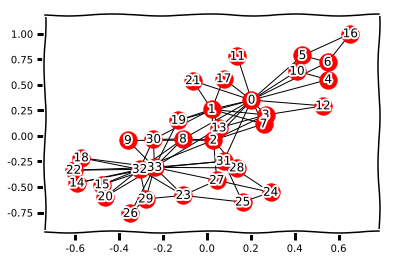

In [28]:
#original network
nx.draw_networkx(G,pos)

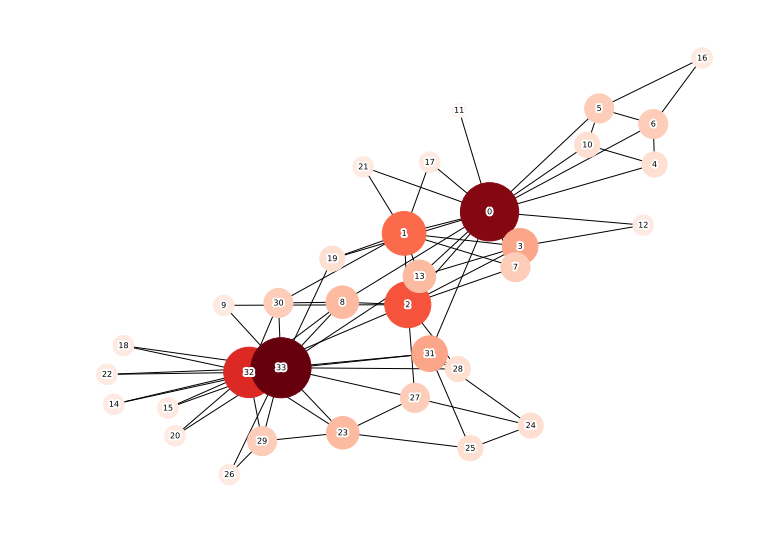

In [29]:
# Degree Centrality
dc = nx.degree_centrality(G)
plt.figure(1,figsize=(10,7))
coord = nx.spring_layout(G)

nx.draw(G,
        pos,
        nodelist = dc.keys(),
        with_labels=True,
        node_size = [d*7000 for d in dc.values()],
        node_color=dc.values(),
        font_size = 8,
        cmap=plt.cm.Reds
       )

In [30]:
? nx.draw_networkx

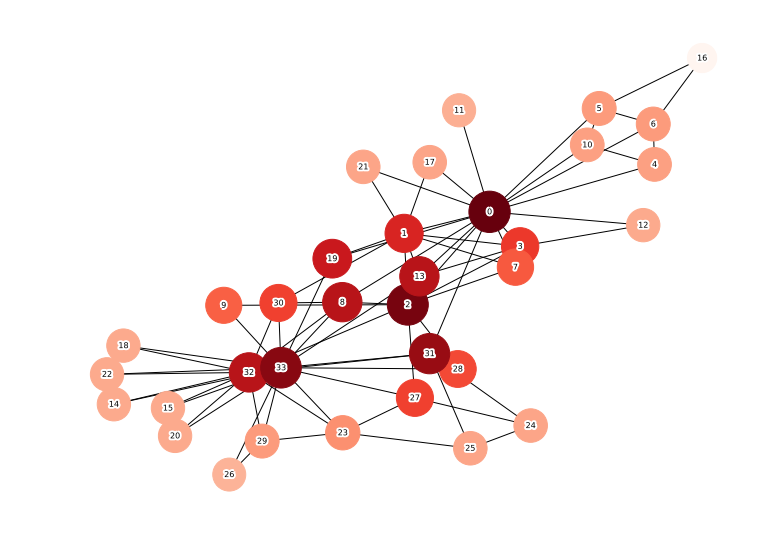

In [31]:
# closeness centrality
cl = nx.closeness_centrality(G)
plt.figure(1,figsize=(10,7))

nx.draw(G,
        pos,
        nodelist = cl.keys(),
        with_labels=True,
        node_size = [c*3000 for c in cl.values()],
        node_color=cl.values(),
        font_size = 8,
        cmap=plt.cm.Reds
       )

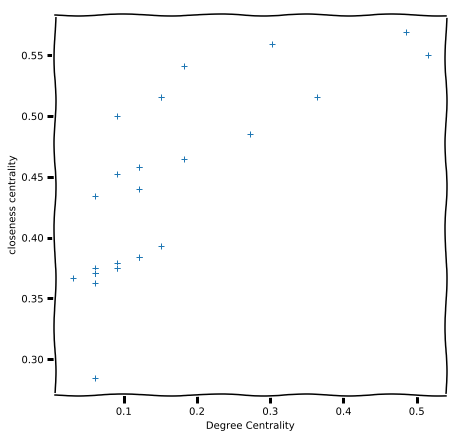

In [32]:
# plot degree-closeness
xdata = dc.values()
ydata = cl.values()
plt.figure(1,figsize=(7,7))
plt.plot(xdata,ydata,'+')
plt.xlabel('Degree Centrality')
plt.ylabel('closeness centrality')

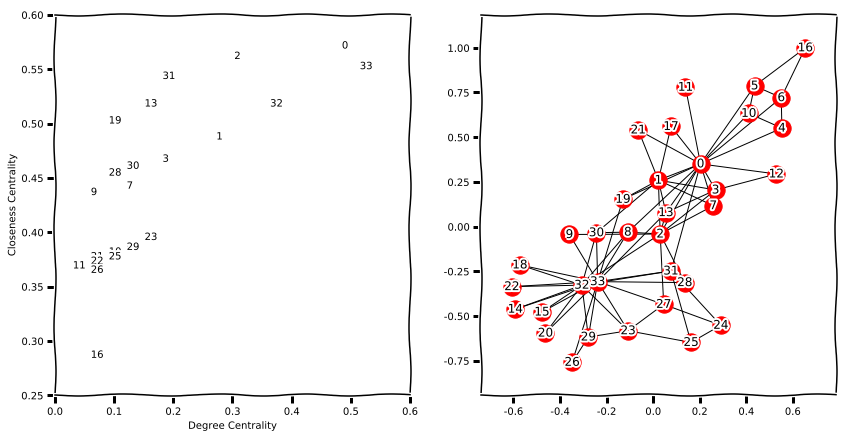

In [38]:
# Add node ids
fig = plt.figure(1,figsize=(14,7))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

for v in xrange(len(dc)):
    ax1.text(x = xdata[v], y = ydata[v], s=str(v))
ax1.set_xlim(0, 0.6)
ax1.set_ylim(0.25, 0.6)
ax1.set_xlabel('Degree Centrality')
ax1.set_ylabel('Closeness Centrality')

ax2 = nx.draw_networkx(G, pos)